In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pennsylvania_grids = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_prism_grids/grids.shp')
pennsylvania_county = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/data/PA County Boundaries Spatial Data Current Transportation_20241020')

In [3]:

#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_5mm_adam_November_1991_2023.csv')
#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_5mm_adam_November_2020_2023_all_cyle.csv')
#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_5mm_adam_November_1991_2022_all_cyle.csv')
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_5mm_adam_November_1991_2022_all_cyle_november_15c.csv')

In [4]:
data["geometry"] = pennsylvania_grids["geometry"]
data['lat'] = pennsylvania_grids['lat']
data['lon'] = pennsylvania_grids['lon']
data = gpd.GeoDataFrame(data)

In [5]:
data1 = data.copy()

In [6]:
def calc_wintering(data, year):
    data1 = data.copy()
    data1[f'winter_mortality_2_{year}'] = data1[f"wintering_{year}"].apply(lambda x: len([x for x in eval(x)['temps'] if x > 6.53]) * 0.0025)
    data1[f'winter_cum_deg_{year}'] = data1[f"wintering_{year}"].apply(lambda x: np.sum([x for x in eval(x)['temps'] if x > 6.53]))
    return data1

In [7]:
'''
num_years = 33
for i in range(num_years):
    year = 1991 + i
    data1[f"eggs_{year}"] = [eval(x)['eggs'] for x in data1[f"reproduction_{year}"].tolist()]


for i in range(num_years):
    year = 1991 + i
    data1[f"precip_effect_{year}"] = [eval(x)['precipitation_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = 1991 + i
    data1[f"temp_effect_{year}"] = [eval(x)['temperature_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = 1991 + i
    data1[f"no_foraging_days_{year}"] = [eval(x)['non_foraging_days'] for x in data1[f"reproduction_{year}"].tolist()]

data1
'''

'\nnum_years = 33\nfor i in range(num_years):\n    year = 1991 + i\n    data1[f"eggs_{year}"] = [eval(x)[\'eggs\'] for x in data1[f"reproduction_{year}"].tolist()]\n\n\nfor i in range(num_years):\n    year = 1991 + i\n    data1[f"precip_effect_{year}"] = [eval(x)[\'precipitation_effect\'] for x in data1[f"reproduction_{year}"].tolist()]\n\nfor i in range(num_years):\n    year = 1991 + i\n    data1[f"temp_effect_{year}"] = [eval(x)[\'temperature_effect\'] for x in data1[f"reproduction_{year}"].tolist()]\n\nfor i in range(num_years):\n    year = 1991 + i\n    data1[f"no_foraging_days_{year}"] = [eval(x)[\'non_foraging_days\'] for x in data1[f"reproduction_{year}"].tolist()]\n\ndata1\n'

In [8]:
num_years = 32
start_year = 1991
for i in range(num_years):
    year = start_year + i
    data1[f"eggs_{year}"] = [eval(x)['eggs'] for x in data1[f"reproduction_{year}"].tolist()]
    #data1[f"larvae_mortality_{year}"] = [eval(x)['egg_mortality'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    egg_mortlity = []
    for x in data1[f"egg_larva_mortality_{year}"].tolist():
        try:
            dt = eval(x)
            egg_mortlity.append(dt['mortality'])
        except:
            egg_mortlity.append(0)
    data1[f"larvae_mortality_{year}"] = egg_mortlity
    data1[f"larvae_cold_days_{year}"] = [eval(x)['cold_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    data1[f"larvae_hot_days_{year}"] = [eval(x)['hot_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    data1[f"pre_winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"pre_winter_{year}"].tolist()]
    data1[f"pre_winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"pre_winter_{year}"].tolist()]
    data1[f"winter_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"wintering_{year}"].tolist()]
    data1 = calc_wintering(data1, year)
    data1[f"eggs_1_{year}"] = (data1[f"eggs_{year}"] * (1 - data1[f"larvae_mortality_{year}"]) * (1 - data1[f"pre_winter_mortality_{year}"]) * (1 - data1[f"winter_mortality_{year}"])).astype(int)
    data1[f"eggs_2_{year}"] = (data1[f"eggs_{year}"] * (1 - data1[f"larvae_mortality_{year}"]) * (1 - data1[f"pre_winter_mortality_{year}"]) * (1 - data1[f"winter_mortality_2_{year}"])).astype(int)
    data1[f'forage_{year}'] = [eval(x)['forage_quality'] for x in data1[f"reproduction_{year}"].tolist()]
    data1[f'pre_winter_cum_deg_{year}'] = [eval(x)['cumulative_degrees'] for x in data1[f"pre_winter_{year}"].tolist()]
    #data1['winter_cum_deg'] = [eval(x)['cumulative_degrees'] for x in data1[f"wintering_{year}"].tolist()]

    

for i in range(num_years):
    year = start_year + i
    data1[f"precip_effect_{year}"] = [eval(x)['precipitation_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = start_year + i
    data1[f"temp_effect_{year}"] = [eval(x)['temperature_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = start_year + i
    data1[f"no_foraging_days_{year}"] = [eval(x)['non_foraging_days'] for x in data1[f"reproduction_{year}"].tolist()]

#data1

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages

In [8]:
'''
years = range(1991, 2023)
for year in years:
    data1[f"eggs_1_{year}"] = data1[f"eggs_1_{year}"].apply(lambda x: 0 if x < 0 else x)
    #data1[f"eggs_2_{year}"] = data1[f"eggs_2_{year}"].apply(lambda x: 0 if x < 0 else x)
'''

'\nyears = range(1991, 2023)\nfor year in years:\n    data1[f"eggs_1_{year}"] = data1[f"eggs_1_{year}"].apply(lambda x: 0 if x < 0 else x)\n    #data1[f"eggs_2_{year}"] = data1[f"eggs_2_{year}"].apply(lambda x: 0 if x < 0 else x)\n'

In [9]:
np.max(data1[f"eggs_1_{year}"])

33

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/1597900338.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


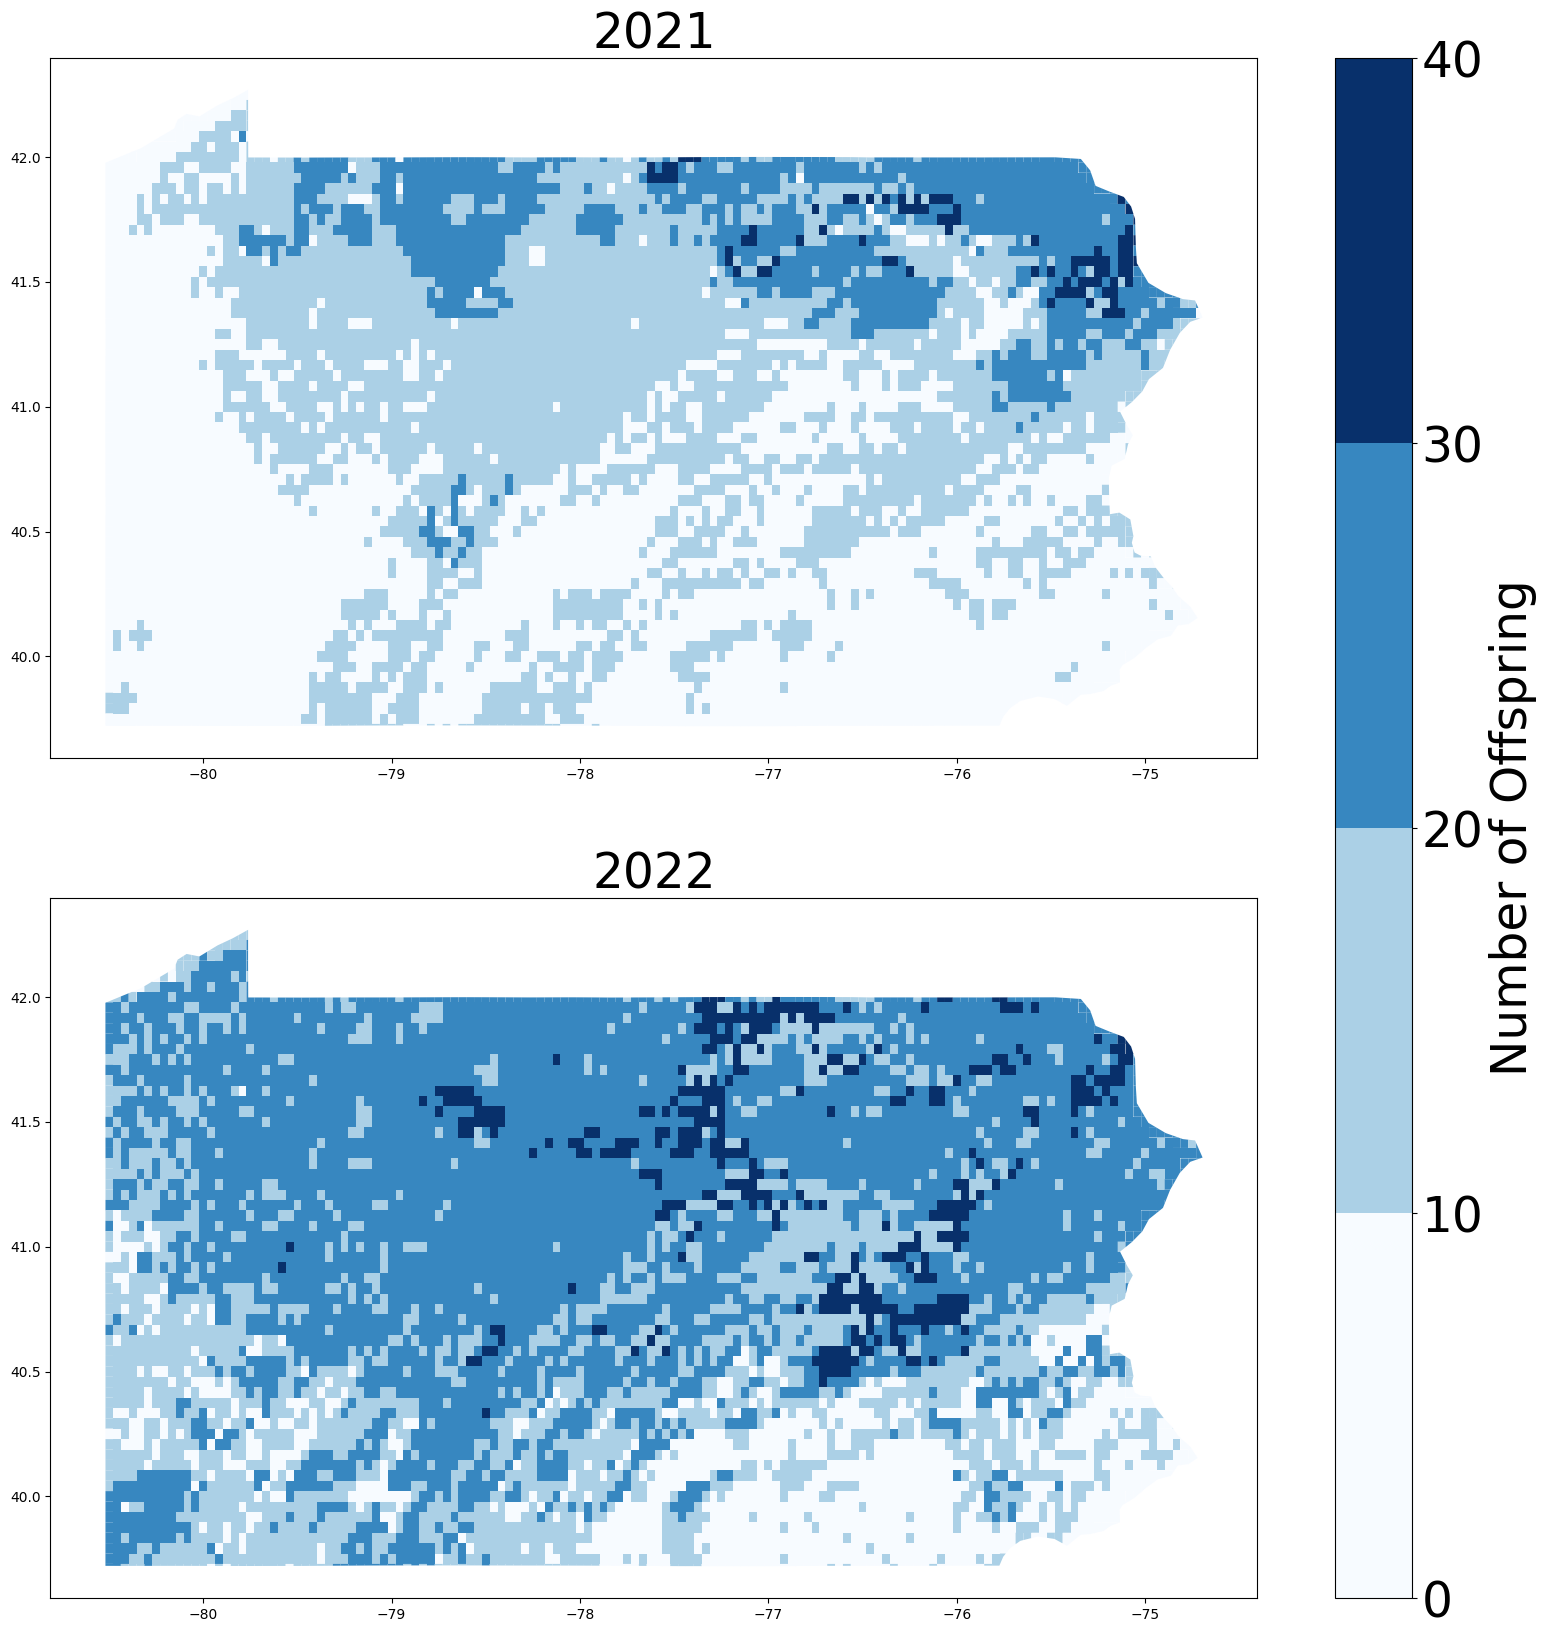

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 10, 20, 30, 40]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 2  # Number of years from 2008 to 2021
fig, axes = plt.subplots(2, 1, figsize=(20, 20))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2021 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    #ax.set_title(str(year))  # Set the title of the subplot
    # increase the font size of the title
    ax.set_title(str(year), fontdict={'fontsize': '35', 'fontweight' : '3'})
    #ax.set_title(str(year))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
#cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal')
#cbar.set_label('Number of Offsprings')  # label for the colorbar
cbar.set_label('Number of Offspring', fontsize=35)  # label for the colorbar
#cbar.set_label('Number of Offsprings')  # label for the colorbar

cbar.ax.tick_params(labelsize=35)

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [12]:
'''
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 5, 10, 20, 30, 40]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(40, 20))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = start_year + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    #ax.set_title(str(year))  # Set the title of the subplot
    ax.set_title(str(year), fontdict={'fontsize': '30', 'fontweight' : '3'})

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
#cbar.set_label('Number of Offsprings')  # label for the colorbar

cbar.set_label('Number of Offspring', fontsize=30) 

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')
cbar.ax.tick_params(labelsize=30)

# Show the plots
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport matplotlib.colors as mcolors\n\n# Define your custom bin edges\nbins = [0, 5, 10, 20, 30, 40]\n\n# Create a colormap and normalize it based on your bin edges\ncmap = plt.cm.get_cmap('Blues', len(bins) - 1)\nnorm = mcolors.BoundaryNorm(bins, len(bins) - 1)\n\n# Create a figure and subplots dynamically for each year\nnum_years = 16  # Number of years from 2008 to 2021\nfig, axes = plt.subplots(4, 4, figsize=(40, 20))  # 2 rows, 7 columns for 14 years\n\n# Flatten the axes array for easier indexing\naxes = axes.flatten()\n\n# Loop through each year\nfor i in range(num_years):\n    year = start_year + i\n    ax = axes[i]  # Get the current axis\n    \n    # Plot for the current year\n    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)\n    #ax.set_title(str(year))  # Set the title of the subplot\n    ax.set_title(str(year), fontdict={'fontsize': '30', 'fontweight' : '3'})\n\n# Create a colorbar\nsm = plt.cm.ScalarMappa

In [13]:
'''
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 5, 10, 20, 30, 40]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(40, 20))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = start_year + i + 16
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    #ax.set_title(str(year))  # Set the title of the subplot
    ax.set_title(str(year), fontdict={'fontsize': '30', 'fontweight' : '3'})

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
#cbar.set_label('Number of Offsprings')  # label for the colorbar
cbar.set_label('Number of Offspring', fontsize=30) 

#cbar.set_ticks([0, 5, 10, 20, 30, 40], fontsize=30)
# Add a title to the figure
#fig.suptitle('Reproduction Visualization')
cbar.ax.tick_params(labelsize=30)

# Show the plots
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport matplotlib.colors as mcolors\n\n# Define your custom bin edges\nbins = [0, 5, 10, 20, 30, 40]\n\n# Create a colormap and normalize it based on your bin edges\ncmap = plt.cm.get_cmap('Blues', len(bins) - 1)\nnorm = mcolors.BoundaryNorm(bins, len(bins) - 1)\n\n# Create a figure and subplots dynamically for each year\nnum_years = 16  # Number of years from 2008 to 2021\nfig, axes = plt.subplots(4, 4, figsize=(40, 20))  # 2 rows, 7 columns for 14 years\n\n# Flatten the axes array for easier indexing\naxes = axes.flatten()\n\n# Loop through each year\nfor i in range(num_years):\n    year = start_year + i + 16\n    ax = axes[i]  # Get the current axis\n    \n    # Plot for the current year\n    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)\n    #ax.set_title(str(year))  # Set the title of the subplot\n    ax.set_title(str(year), fontdict={'fontsize': '30', 'fontweight' : '3'})\n\n# Create a colorbar\nsm = plt.cm.Scalar

In [14]:
years = range(1991, 2023)
data1['total_eggs'] = [sum([data1[f'eggs_1_{year}'][i] for year in years]) for i in range(len(data1))]
data1['avg_eggs'] = [np.mean([data1[f'eggs_1_{year}'][i] for year in years]) for i in range(len(data1))]
data1['zeros_eggs'] = [ len([data1[f'eggs_1_{year}'][i] for year in years if data1[f'eggs_1_{year}'][i] == 0 ]) for i in range(len(data1))]

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages

In [15]:
#data1['20s_eggs'] = [ len([data1[f'eggs_1_{year}'][i] for year in years if data1[f'eggs_1_{year}'][i] > 20 ]) for i in range(len(data1))]

In [17]:
data2 = data1.copy()

In [18]:
data2['geometry'] = gpd.points_from_xy(data2.lon, data2.lat)

In [19]:
data2 = pennsylvania_county.sjoin(data2, how='inner', op='intersects')

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2187: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [20]:
dt = data2[['county_nam', 'avg_eggs']].groupby('county_nam', as_index=False).mean()

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/2105175442.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/2105175442.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['avg_eggs']):


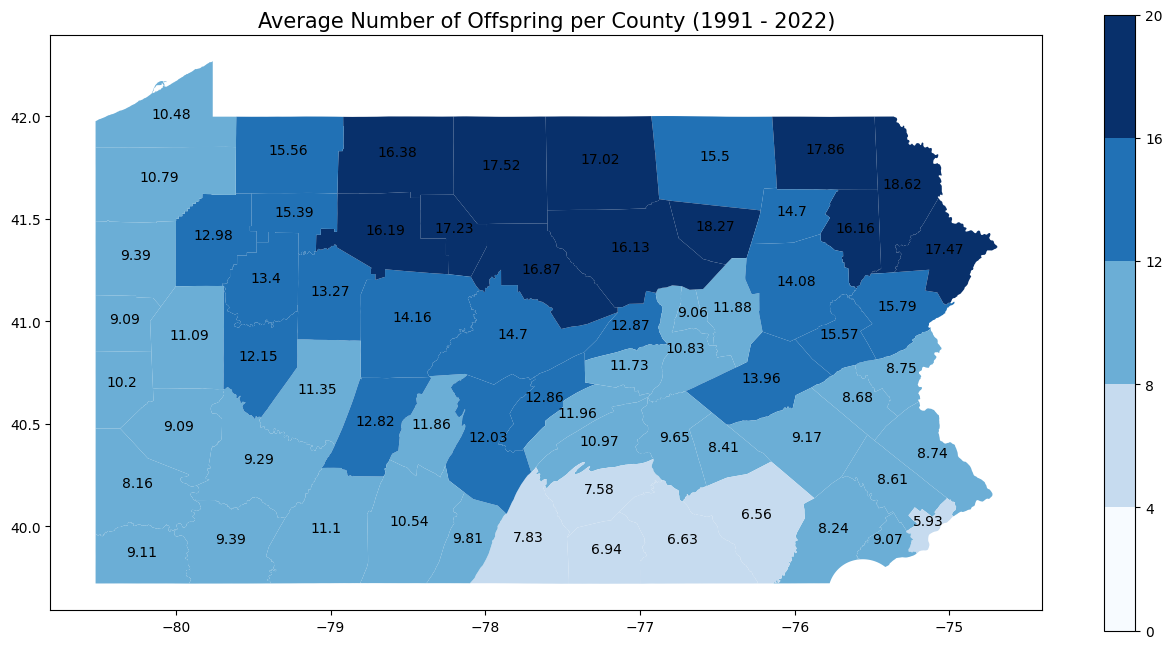

In [22]:
dt = data2[['county_nam', 'avg_eggs']].groupby('county_nam', as_index=False).mean()

# Define your custom bin edges
bins = [0, 4, 8, 12, 16, 20]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

merged_data = pennsylvania_county.merge(dt, on='county_nam')
merged_data.plot(column='avg_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y, label, fontsize=6, ha='center')

# Add county names to the plot
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['avg_eggs']):
    ax.text(x, y, round(label,2), fontsize=10, ha='center')

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y+0.04, label, fontsize=7, ha='center')

plt.title('Average Number of Offspring per County (1991 - 2022)', fontsize=15)
plt.show()

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/3446824217.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', len(bins) - 1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/3446824217.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['zeros_eggs']):


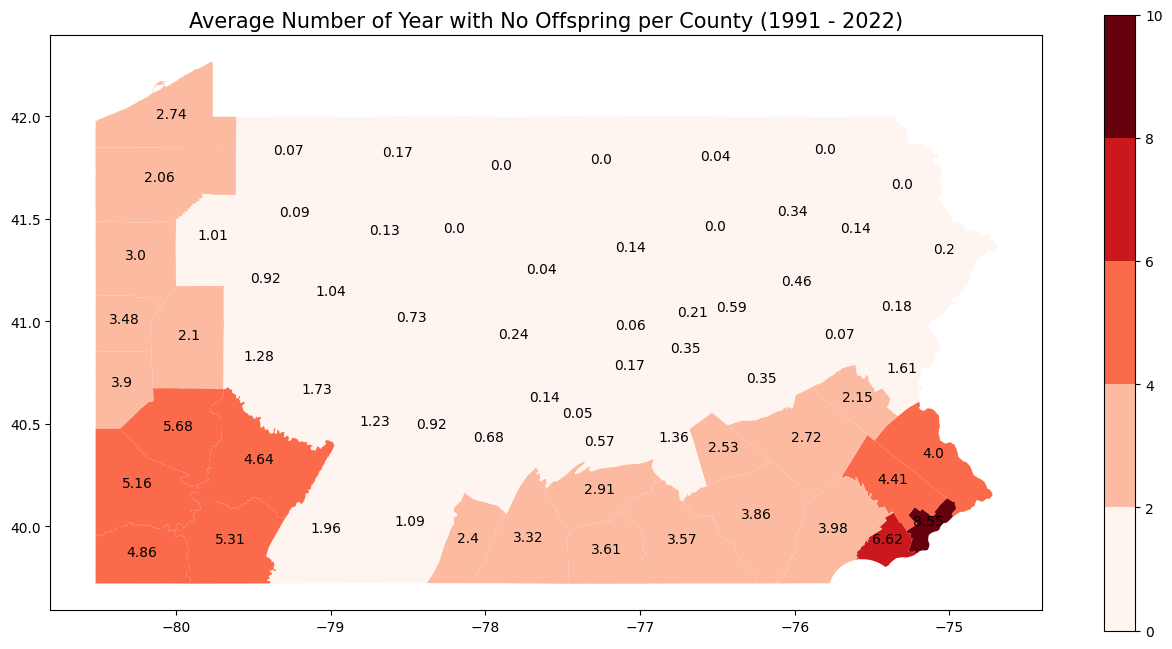

In [23]:
dt = data2[['county_nam', 'zeros_eggs']].groupby('county_nam', as_index=False).mean()

# Define your custom bin edges
bins = [0, 2, 4, 6, 8, 10]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Reds', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

merged_data = pennsylvania_county.merge(dt, on='county_nam')
merged_data.plot(column='zeros_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y, label, fontsize=6, ha='center')

# Add county names to the plot
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['zeros_eggs']):
    ax.text(x, y, round(label,2), fontsize=10, ha='center')

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y+0.04, label, fontsize=7, ha='center')

plt.title('Average Number of Year with No Offspring per County (1991 - 2022)', fontsize=15)
plt.show()

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/1409257967.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


Text(0.5, 1.0, 'Average Number of Offspring (1991 - 2022)')

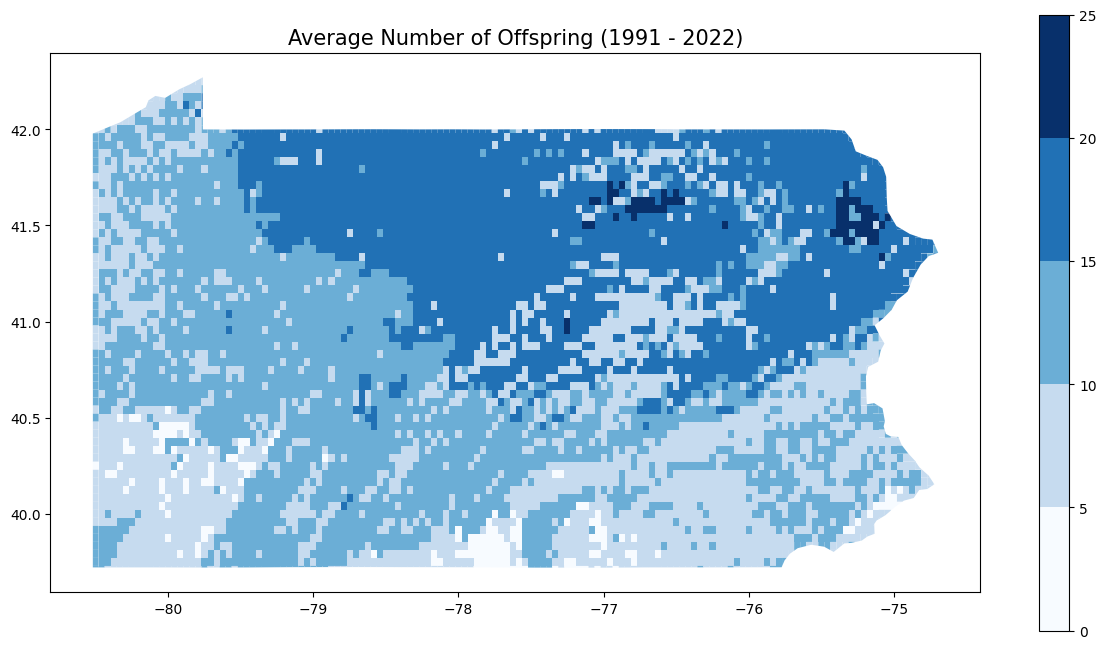

In [24]:
# Define your custom bin edges
#bins = [0, 4, 8, 12, 16, 20, 24]
bins = [0, 5, 10, 15, 20, 25]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)
data1.plot(column=f'avg_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Set the legend label
#fig.set_label('Number of Offsprings')

plt.title('Average Number of Offspring (1991 - 2022)', fontsize=15)

In [25]:
data1['zeros_eggs'] = [ len([data1[f'eggs_1_{year}'][i] for year in years if data1[f'eggs_1_{year}'][i] < 5 ]) for i in range(len(data1))]

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/3252973332.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


Text(0.5, 1.0, 'Number of Years with No Offspring (1991 - 2022)')

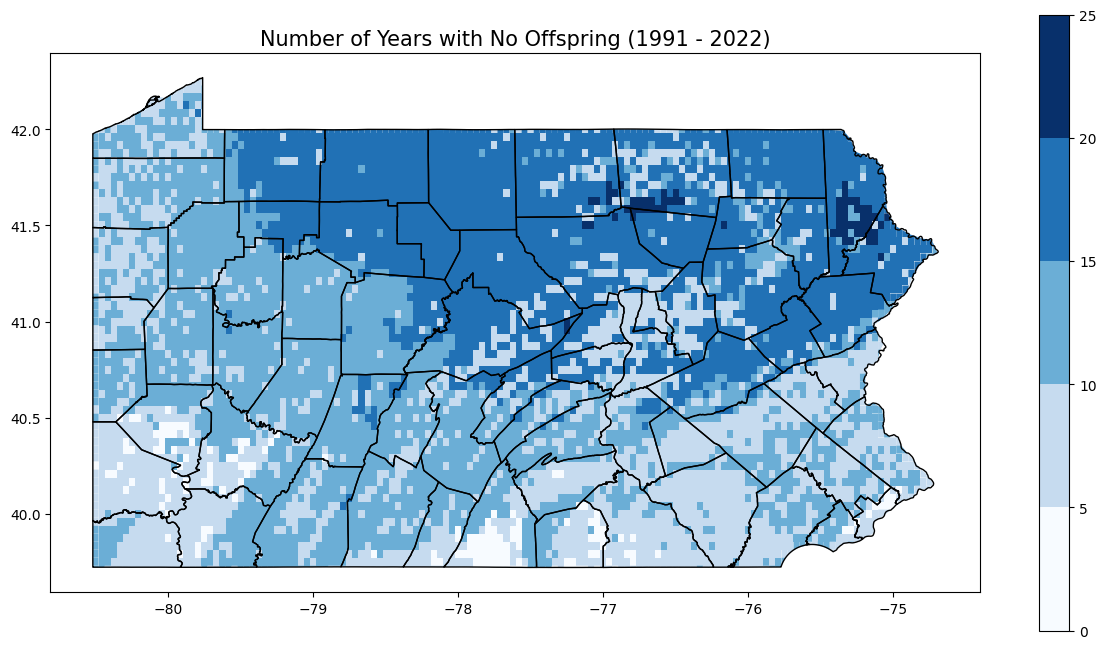

In [27]:
# Define your custom bin edges
bins = [0, 5, 10, 15, 20, 25]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)
data1.plot(column=f'avg_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Plot the Pennsylvania county border
pennsylvania_county.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')

plt.title('Number of Years with No Offspring (1991 - 2022)', fontsize=15)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/3837428915.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', len(bins) - 1)


Text(0.5, 1.0, 'Number of Years with No Offspring (1991 - 2022)')

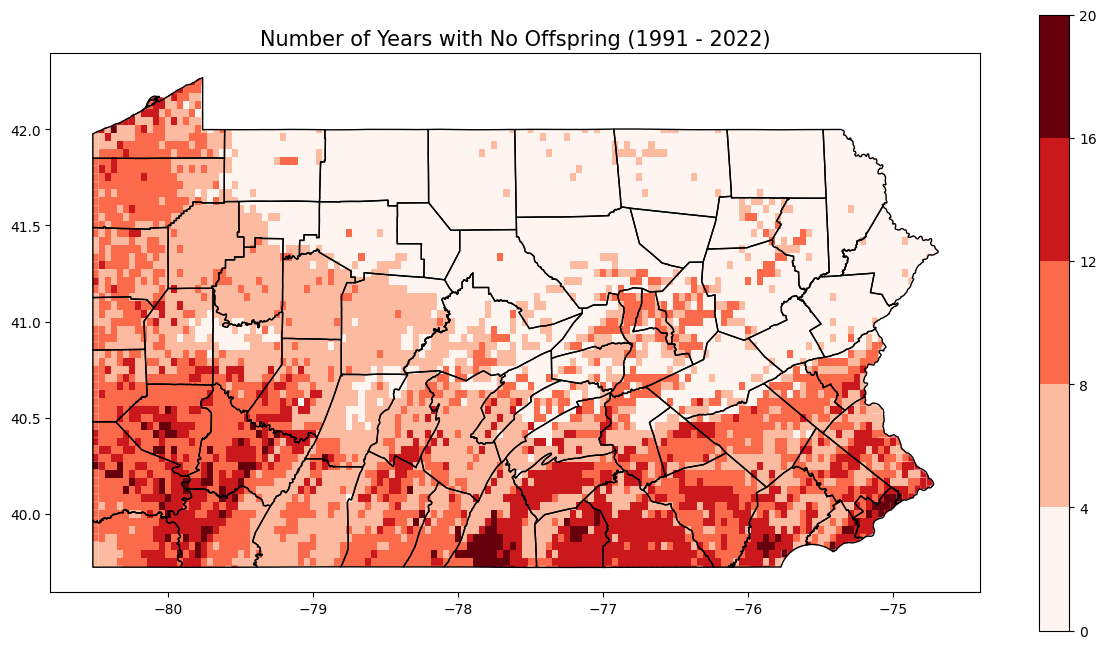

In [28]:
# Define your custom bin edges
bins = [0, 4, 8, 12, 16, 20]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Reds', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)
data1.plot(column=f'zeros_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Plot the Pennsylvania county border
pennsylvania_county.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')

plt.title('Number of Years with No Offspring (1991 - 2022)', fontsize=15)

In [29]:
def getJulianDay(emergence):
    emergence = datetime.strptime(emergence, '%Y-%m-%d').date()
    starting_date = datetime.strptime(f'{emergence.year}-01-01', '%Y-%m-%d').date()
    return (emergence - starting_date).days + 1

In [30]:
###################### Trend Analysis for Pennsylvania ######################

In [31]:
### extract the data for each year
non_foraging_days = []
emergence_dates = []
precip_effect_days = []
temp_effect_days = []
years = []  
offsprings = []
offsprings_2 = []
cols = []
rows = []
grids = []
larvae_mortality = []
larva_cold_days = []
larva_hot_days = []
pre_winter_mortality = []
pre_winter_cum = []
winter_mortality = []
winter_mortality_2 = []
winter_cum = []
forage_quality = []
lat = []
lon = []

num_years = 32
# non_foraging_days
for i in range(num_years):
    year = 1991 + i
    # non_foraging days
    non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"no_foraging_days_{year}"].tolist()))
    # emergence date
    emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # precip_effect_days
    precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # temp_effect_days
    temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(data1[f"eggs_{year}"].tolist())
    offsprings_2.extend(data1[f"eggs_2_{year}"].tolist())

    # mortality
    larvae_mortality.extend(data1[f"larvae_mortality_{year}"].tolist())
    # cold days
    larva_cold_days.extend(data1[f"larvae_cold_days_{year}"].tolist())
    # hot days
    larva_hot_days.extend(data1[f"larvae_hot_days_{year}"].tolist())
    # pre winter mortality
    pre_winter_mortality.extend(data1[f"pre_winter_mortality_{year}"].tolist())
    # pre winter cumulative
    pre_winter_cum.extend(data1[f"pre_winter_cum_deg_{year}"].tolist())
    # winter mortality
    winter_mortality.extend(data1[f"winter_mortality_{year}"].tolist())
    # winter mortality 2
    winter_mortality_2.extend(data1[f"winter_mortality_2_{year}"].tolist())
    # winter cumulative
    winter_cum.extend(data1[f"winter_cum_deg_{year}"].tolist())
    # forage quality
    forage_quality.extend(data1[f"forage_{year}"].tolist())

    cols.extend(data1['col'].tolist())
    rows.extend(data1['row'].tolist())
    grids.extend(data1['grid_id'].tolist())

    #lat.extend(data1['lat'].tolist())
    #lon.extend(data1['lon'].tolist())



In [32]:
import math

In [33]:
df_pa = pd.DataFrame({'Year': years, 'Non_Foraging_Days': non_foraging_days, 'Emergence': emergence_dates, 'Rainy_Foraging_Days': precip_effect_days, 'Cold_Foraging_Days': temp_effect_days, 'Offsprings': offsprings, 'Offsprings_2': offsprings_2, 'LarvaeMortality': larvae_mortality, 'Cold_Development_Days': larva_cold_days, 'Hot_Development_Days': larva_hot_days, 'Winter_Mortality': pre_winter_mortality, 'PreWinterCumulative': pre_winter_cum, 'WinterMortality': winter_mortality, 'WinterMortality2': winter_mortality_2, 'WinterCumulative': winter_cum, 'Col': cols, 'Row': rows, 'GridId': grids, 'Spring_Foragin_Quality': forage_quality, 'Hot_Pre_Winter_Days': [math.ceil(x/0.0025) for x in  pre_winter_mortality]})

In [ ]:
#df_pa = pd.DataFrame({'Year': years, 'Non_Foraging_Days': non_foraging_days, 'Emergence': emergence_dates, 'Precipitation_Effect': precip_effect_days, 'Temperature_Effect': temp_effect_days, 'Offsprings': offsprings, 
#                      'Col': cols, 'Row': rows, 'Grid': grids})

In [ ]:
'''
def geTempEffect(temps, threshold):
    return len([temp for temp in temps if temp < threshold])    

def gePrecipEffect(precips, threshold):
    return len([precip for precip in precips if precip >= threshold])

def getOffsprings(temps, precips, threshold_temp, threshold_precip):
    offspring = 0
    for i in range(len(temps)):
        if temps[i] >= threshold_temp and precips[i] < threshold_precip:
            offspring += 2
    
    return offspring

def getNonForagingDays(temps, precips, threshold_temp, threshold_precip):
    days = 0
    for i in range(len(temps)):
        if temps[i] < threshold_temp or precips[i] >= threshold_precip:
            days += 1

    return days


df_pa['Tempeprature_Effect_'] = df_pa.apply(lambda x: geTempEffect(x['Temps'], 13.9), axis=1)
df_pa['Precipitation_Effect_'] = df_pa.apply(lambda x: gePrecipEffect(x['Precips'], 1), axis=1)
df_pa['Offsprings_'] = df_pa.apply(lambda x: getOffsprings(x['Temps'], x['Precips'], 13.9, 1), axis=1)
df_pa['Non_Foraging_Days_'] = df_pa.apply(lambda x: getNonForagingDays(x['Temps'], x['Precips'], 13.9, 1), axis=1)
'''

In [34]:
df_pa['Emergence_Date'] = df_pa['Emergence'].apply(getJulianDay)
df_pa['Julian_Day'] = df_pa['Emergence'].apply(getJulianDay)

In [35]:
import seaborn as sns

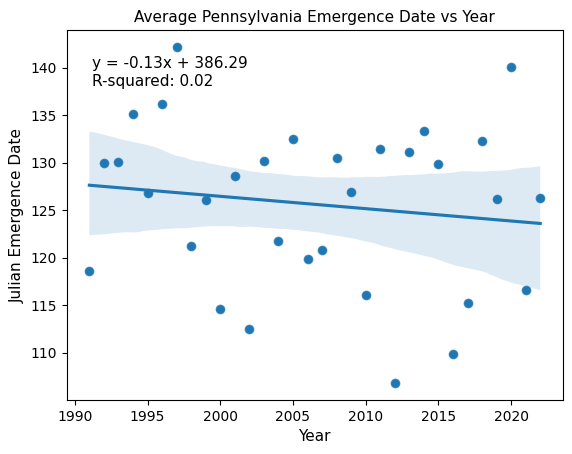

P-value: 0.44
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.6046
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.443
Time:                        18:09:47   Log-Likelihood:                -113.70
No. Observations:                  32   AIC:                             231.4
Df Residuals:                      30   BIC:                             234.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [74]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Julian_Day"]].groupby('Year').mean()["Julian_Day"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Julian Emergence Date', fontsize=11)
plt.title('Average Pennsylvania Emergence Date vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())



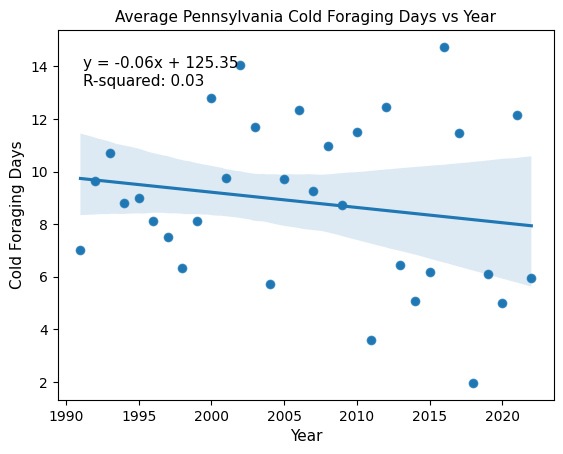

P-value: 0.34
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9455
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.339
Time:                        17:55:56   Log-Likelihood:                -80.774
No. Observations:                  32   AIC:                             165.5
Df Residuals:                      30   BIC:                             168.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [56]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Cold_Foraging_Days"]].groupby('Year').mean()["Cold_Foraging_Days"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Cold Foraging Days', fontsize=11)
plt.title('Average Pennsylvania Cold Foraging Days vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")
    
### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


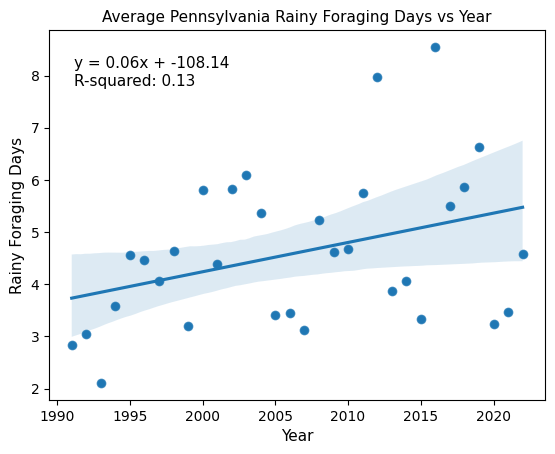

P-value: 0.04
The slope is statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4.466
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0430
Time:                        17:54:48   Log-Likelihood:                -54.882
No. Observations:                  32   AIC:                             113.8
Df Residuals:                      30   BIC:                             116.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [55]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Rainy_Foraging_Days"]].groupby('Year').mean()["Rainy_Foraging_Days"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Rainy Foraging Days', fontsize=11)
plt.title('Average Pennsylvania Rainy Foraging Days vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


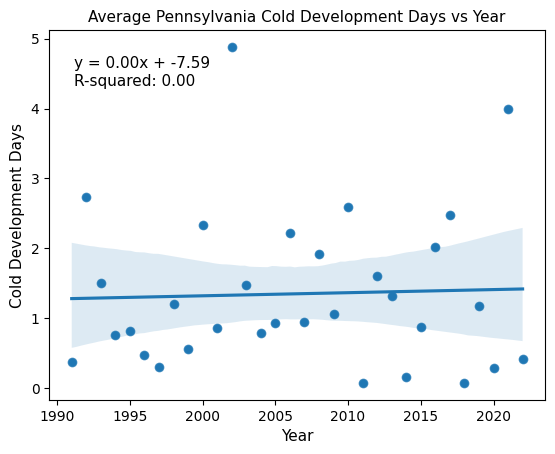

P-value: 0.84
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.04189
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.839
Time:                        17:54:16   Log-Likelihood:                -48.464
No. Observations:                  32   AIC:                             100.9
Df Residuals:                      30   BIC:                             103.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [54]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Cold_Development_Days"]].groupby('Year').mean()["Cold_Development_Days"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Cold Development Days', fontsize=11)
plt.title('Average Pennsylvania Cold Development Days vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


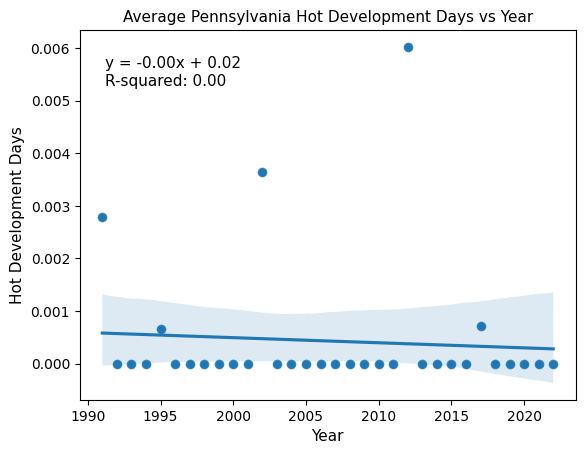

P-value: 0.70
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1480
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.703
Time:                        17:53:19   Log-Likelihood:                 167.88
No. Observations:                  32   AIC:                            -331.8
Df Residuals:                      30   BIC:                            -328.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [53]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Hot_Development_Days"]].groupby('Year').mean()["Hot_Development_Days"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Hot Development Days', fontsize=11)
plt.title('Average Pennsylvania Hot Development Days vs Year', fontsize=11)

# Show the plot
plt.show()


from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


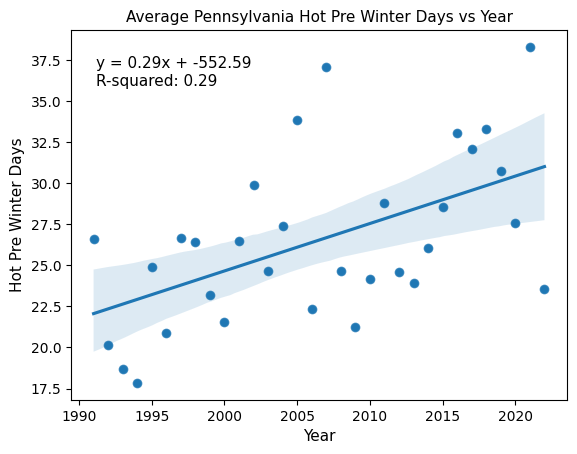

P-value: 0.00
The slope is statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     12.14
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00154
Time:                        17:52:46   Log-Likelihood:                -91.240
No. Observations:                  32   AIC:                             186.5
Df Residuals:                      30   BIC:                             189.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [52]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Hot_Pre_Winter_Days"]].groupby('Year').mean()["Hot_Pre_Winter_Days"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Hot Pre Winter Days', fontsize=11)
plt.title('Average Pennsylvania Hot Pre Winter Days vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


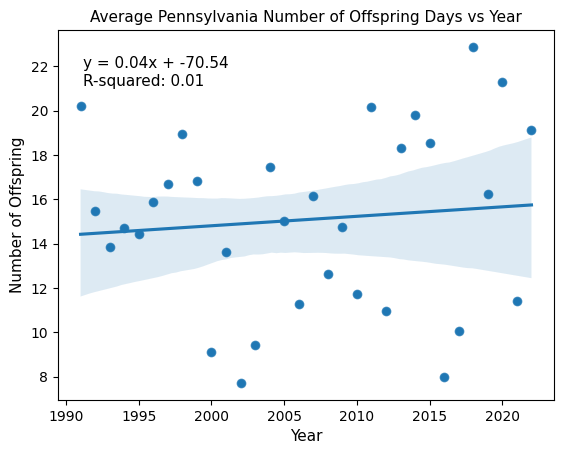

P-value: 0.59
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.2975
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.590
Time:                        17:50:28   Log-Likelihood:                -89.421
No. Observations:                  32   AIC:                             182.8
Df Residuals:                      30   BIC:                             185.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [48]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Offsprings"]].groupby('Year').mean()["Offsprings"].tolist() 
#vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Offspring', fontsize=11)
plt.title('Average Pennsylvania Number of Offspring Days vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")


### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year']]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


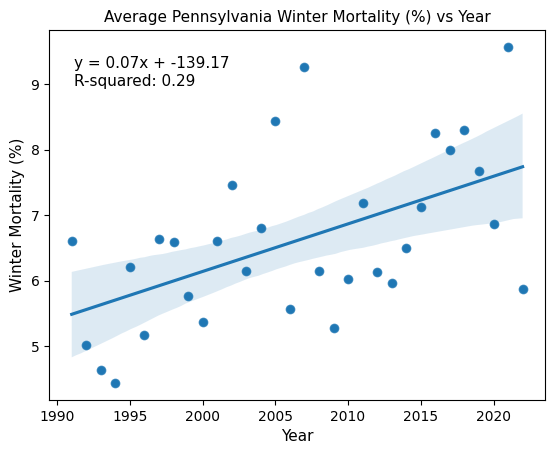

P-value: 0.00
The slope is statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     12.27
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00146
Time:                        17:50:57   Log-Likelihood:                -46.930
No. Observations:                  32   AIC:                             97.86
Df Residuals:                      30   BIC:                             100.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [49]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Winter_Mortality"]].groupby('Year').mean()["Winter_Mortality"].tolist() 
vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Winter Mortality (%)', fontsize=11)
plt.title('Average Pennsylvania Winter Mortality (%) vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


In [ ]:
df_pa

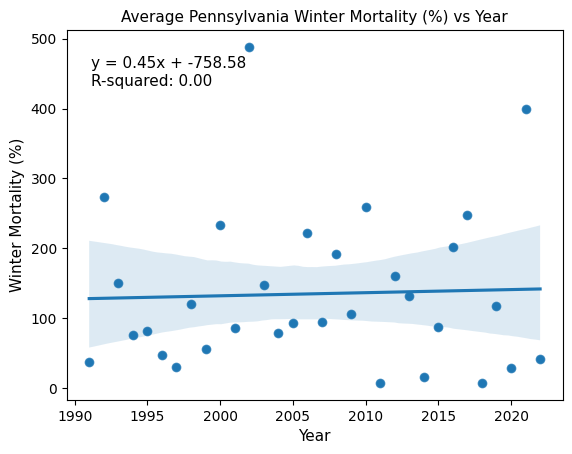

P-value: 0.84
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.04189
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.839
Time:                        17:51:15   Log-Likelihood:                -195.83
No. Observations:                  32   AIC:                             395.7
Df Residuals:                      30   BIC:                             398.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [50]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Cold_Development_Days"]].groupby('Year').mean()["Cold_Development_Days"].tolist() 
vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Winter Mortality (%)', fontsize=11)
plt.title('Average Pennsylvania Winter Mortality (%) vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")

### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


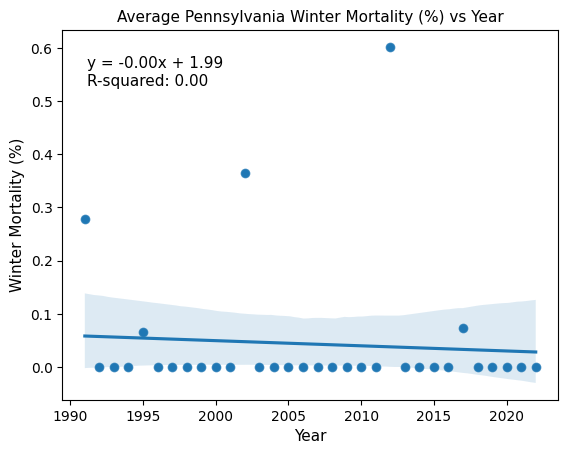

P-value: 0.70
The slope is not statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1480
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.703
Time:                        17:51:43   Log-Likelihood:                 20.510
No. Observations:                  32   AIC:                            -37.02
Df Residuals:                      30   BIC:                            -34.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [51]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Hot_Development_Days"]].groupby('Year').mean()["Hot_Development_Days"].tolist() 
vals = [ val * 100 for val in vals]

df = pd.DataFrame({'Year': years, 'Julian_Day': vals})

df.plot(x='Year', y='Julian_Day', kind='scatter')
sns.regplot(x='Year', y='Julian_Day', data=df)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation and R-squared value on the graph
plt.annotate(f'{equation}\nR-squared: {r_value**2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

plt.xlabel('Year', fontsize=11)
plt.ylabel('Winter Mortality (%)', fontsize=11)
plt.title('Average Pennsylvania Winter Mortality (%) vs Year', fontsize=11)

# Show the plot
plt.show()

from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Julian_Day'])

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
print(f'P-value: {p_value:.2f}')
if p_value < significance_level:
    print("The slope is statistically significant.")
else:
    print("The slope is not statistically significant.")


### A new way to get thee regression model and t-test results
data3 = pd.DataFrame({'Year': years, 'Outcome': vals})

import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with predictors X and outcome Y
X = data3[['Year' ]]  # Independent variables
X = sm.add_constant(X)  # Adds the intercept term
Y = data3['Outcome']     # Dependent variable

# Fit the model
model = sm.OLS(Y, X).fit()

# Model summary includes t-tests for predictors, F-test, and R²
print(model.summary())


In [58]:
predictors = df_pa[[
    'Emergence_Date',
 'Rainy_Foraging_Days',
 'Cold_Foraging_Days',
 'Cold_Development_Days',
 'Hot_Development_Days',
 'Spring_Foragin_Quality',
 'Hot_Pre_Winter_Days',
]]
response = df_pa['Offsprings']   

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the response variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6523324547593061


In [60]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.989962688497162


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_41824/2437017576.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


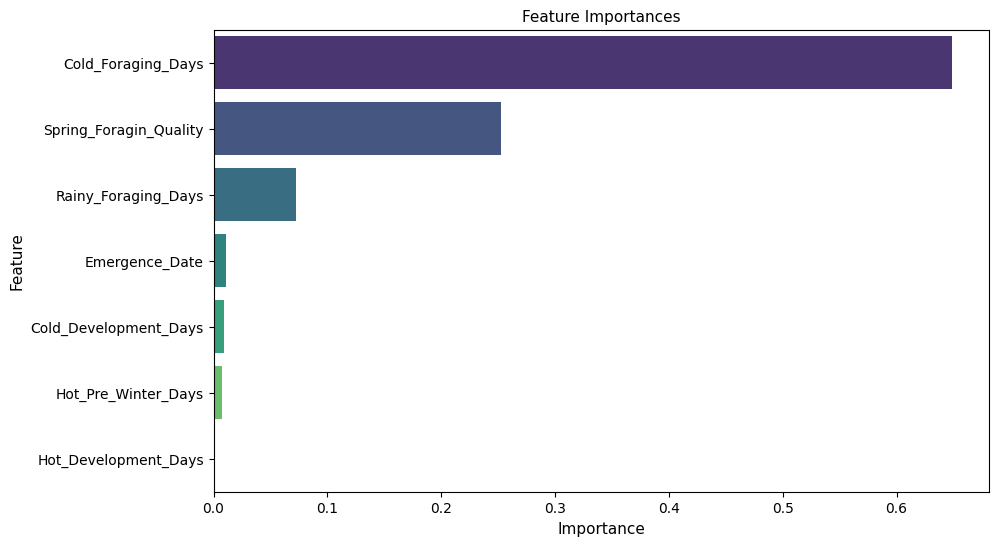

In [61]:
# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_df = pd.DataFrame({'Feature': predictors.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order

feature_df = feature_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')

plt.xlabel('Importance', fontsize=11)

plt.ylabel('Feature', fontsize=11)

plt.title('Feature Importances', fontsize=11)

plt.show()

In [65]:
def convertJulianToDateTime(julian, year):
    return datetime.strptime(f'{year}-01-01', '%Y-%m-%d').date() + pd.DateOffset(days=julian-1)

In [79]:
convertJulianToDateTime(106, 2022)

Timestamp('2022-04-16 00:00:00')

In [80]:
convertJulianToDateTime(142, 2022)

Timestamp('2022-05-22 00:00:00')

ModuleNotFoundError: No module named 'cv2'

In [1]:
import sklearn
print(sklearn.__version__)
  

1.5.2
